<center><h1> DATA SCIENCE

<center><h3>Lab-3

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
DS = pd.read_csv("Titanic_Dataset.csv")
DS.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
DS.shape

(891, 12)

In [4]:
DS.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h2>Exploratory Data Analysis

<b>1. Identification of Missing Values

In [5]:
Missing_values_count=print(DS.isnull().sum())
Missing_values_count

print("\n")
features_with_na=[features for features in DS.columns if DS[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Age
Cabin
Embarked


we can observe the missing values in the data set are in the columns Age, Cabin and Embarked. Also we can understand whether the data set contains missing value using .info() since it provide the count of no  null values. 

<b>2. Identification of All The Numerical Variables

In [7]:

# list of numerical variables
numerical_variables = [feature for feature in DS.columns if DS[feature].dtypes != 'O']
print('Number of Numerical Variables: ', len(numerical_variables))

# visualise the numerical variables
DS[numerical_variables].head()

Number of Numerical Variables:  7


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


Hence, we have identify all the numerical variables present in the dataset and there are total 7 columns of numerical variables.

<b>3. Distribution Of the Numerical Variables

In [8]:
# Numerical variables are of 2 types:
# 1. Discrete Variabls

discrete_variables=[feature for feature in numerical_variables if len(DS[feature].unique())<10]
print("Discrete Variables Count: {}".format(len(discrete_variables)))

Discrete Variables Count: 4


In [9]:
print(discrete_variables)
DS[discrete_variables].head()

['Survived', 'Pclass', 'SibSp', 'Parch']


,Survived,Pclass,SibSp,Parch
0,0,3,1,0
1,1,1,1,0
2,1,3,0,0
3,1,1,1,0
4,0,3,0,0


In [10]:
# 2. Continous Variables

continuous_variables=[feature for feature in numerical_variables if feature not in discrete_variables]
print("Continuous Variables Count: {}".format(len(continuous_variables)))


Continuous Variables Count: 3


In [11]:
print(continuous_variables)
DS[continuous_variables].head()

['PassengerId', 'Age', 'Fare']


,PassengerId,Age,Fare
0,1,22.0,7.2500
1,2,38.0,71.2833
2,3,26.0,7.9250
3,4,35.0,53.1000
4,5,35.0,8.0500


Hence, we have distributed Numerical Variables into two types i.e., Discrete variables which includes columns such as 'Survived', 'Pclass', 'SibSp', 'Parch' and Continuous Variable which include column such as 'PassengerId','PassengerId', 'Age', 'Fare'.

<b>4. Identification of Categorical Variables

In [12]:
# list of numerical variables
categorical_variables = [feature for feature in DS.columns if DS[feature].dtypes == 'O']
print('Number of Categorical Variables: ', len(categorical_variables))

# visualise the numerical variables
DS[categorical_variables].head()

Number of Categorical Variables:  5


,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


Hence, we have identify the categorical variables present in the dataset and there are total 5 columns of categorical variables.

<b>5. Cardinality of Categorical Variables

In [13]:
Cardinality_Value=DS[categorical_variables].nunique()
print(Cardinality_Value)



Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64


    Columns  Unique Values
0      Name            891
1       Sex              2
2    Ticket            681
3     Cabin            147
4  Embarked              3


<AxesSubplot:xlabel='Columns'>

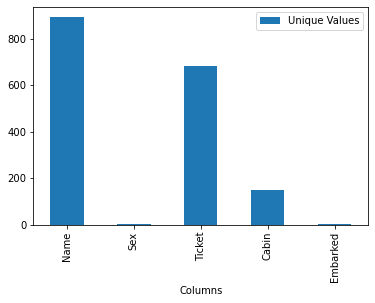

In [14]:
UV= {'Columns':['Name','Sex','Ticket','Cabin','Embarked'],
     'Unique Values':[891,2,681,147,3]}
DF = pd.DataFrame(UV)
print(DF)

DF.plot.bar('Columns','Unique Values')

Hence, we have a found the cardinality of a categorical variable i.e., the number of unique values present inside the particular column.

<b>6. Identification of Outliers

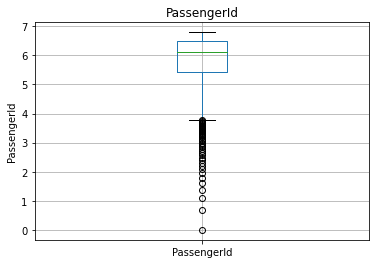

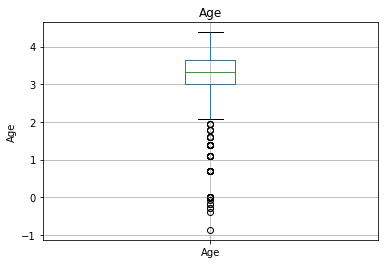

In [16]:
for feature in continuous_variables:
    data=DS.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

Hence, we have identified the outliers present in the numerical variables columns which are aslo a continuous variables.

<b>7. Relationship between independent and dependent variables.

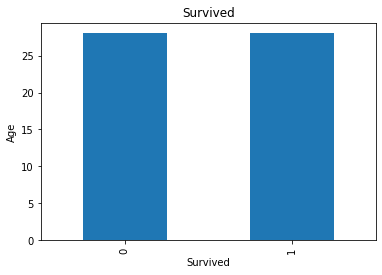

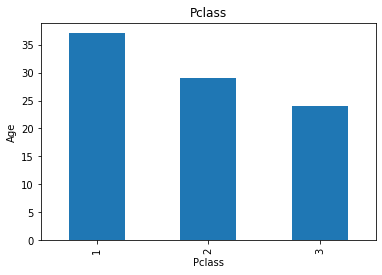

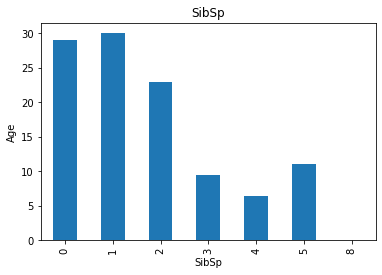

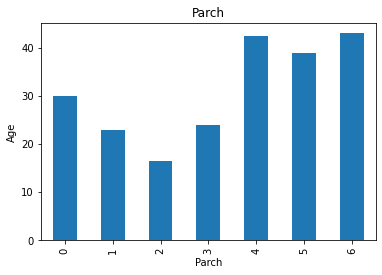

In [17]:
for feature in discrete_variables:
    data=DS.copy()
    data.groupby(feature)['Age'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Age')
    plt.title(feature)
    plt.show()

Hence, we have found the relationship between the discrete variable considering as independent variable and Age as dependent variable. We can also select continuous variable and observe the result.

<b>8. Correlation between the variables

<AxesSubplot:>

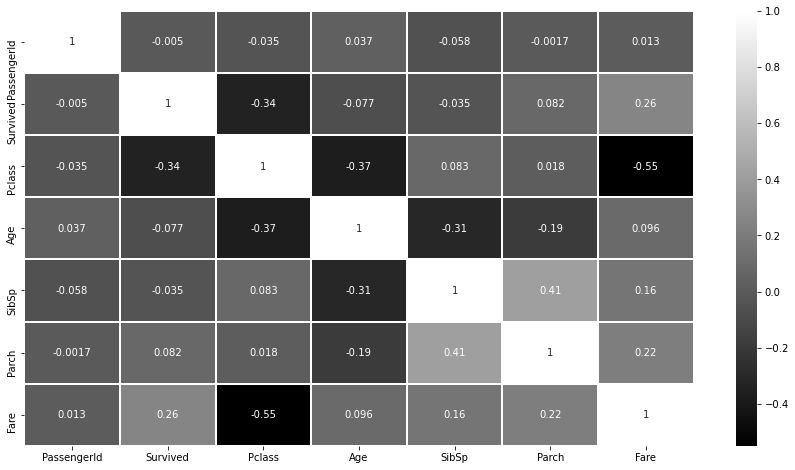

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(DS.corr(), annot=True, cmap="gist_yarg_r", linewidths=1)

Hence, we plot a heatmap for showing the correlation between the variable whether the variable in a dataset is strongly, positively and negatively correlated.

<b>In this lab, we have performed EDA on the given dataset. Also, we identify the numerical and categorical variables and its types. Along, with that we have also found the cardinality i.e., uniques values and identify the outliers present inside the numerical variables. At the end we implemted an heatmap graph which shows the correlation between the variables in the dataset.

NAME: **Rishab Jha**

*PRN*: **20190802072**